## 目的
1. 计算左右跨步长
2. 计算步频
3. 计算步高

In [20]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 计算左右跨步长
L_heel= 1725
L_heel_again = 1935
L_heel_again1 = 2169
L_heel_events = [L_heel,L_heel_again,L_heel_again1]

R_heel = 1817
R_heel_again = 2051
R_heel_agian1 = 2272
R_heel_events = [R_heel,R_heel_again,R_heel_agian1]


In [22]:
# 读取文件
path = Path(input("请输入当前路径："))
os.chdir(path)

print("当前路径为：", os.getcwd())

当前路径为： /Users/wangshuaibo/Downloads


In [23]:
filename = "20230705_李平军_Xsens_无矫形器-1.xlsx"
excelfile = pd.ExcelFile(filename)
sheetname = excelfile.sheet_names
sheetname

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [24]:
df = pd.read_excel(filename, sheet_name="Segment Position")
df.columns

Index(['Frame', 'Pelvis x', 'Pelvis y', 'Pelvis z', 'L5 x', 'L5 y', 'L5 z',
       'L3 x', 'L3 y', 'L3 z', 'T12 x', 'T12 y', 'T12 z', 'T8 x', 'T8 y',
       'T8 z', 'Neck x', 'Neck y', 'Neck z', 'Head x', 'Head y', 'Head z',
       'Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z',
       'Right Upper Arm x', 'Right Upper Arm y', 'Right Upper Arm z',
       'Right Forearm x', 'Right Forearm y', 'Right Forearm z', 'Right Hand x',
       'Right Hand y', 'Right Hand z', 'Left Shoulder x', 'Left Shoulder y',
       'Left Shoulder z', 'Left Upper Arm x', 'Left Upper Arm y',
       'Left Upper Arm z', 'Left Forearm x', 'Left Forearm y',
       'Left Forearm z', 'Left Hand x', 'Left Hand y', 'Left Hand z',
       'Right Upper Leg x', 'Right Upper Leg y', 'Right Upper Leg z',
       'Right Lower Leg x', 'Right Lower Leg y', 'Right Lower Leg z',
       'Right Foot x', 'Right Foot y', 'Right Foot z', 'Right Toe x',
       'Right Toe y', 'Right Toe z', 'Left Upper Leg x', 'Left Upper Leg

<Axes: >

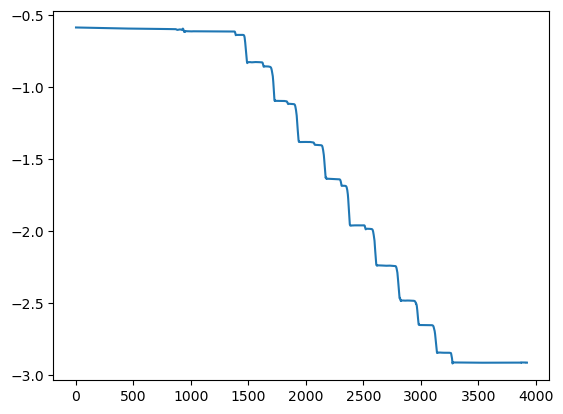

In [25]:
df.loc[:,'Left Foot x'].plot()

## 计算左右步长

In [27]:
# 获取每一次特征时刻对应的踝关节对应 X 数值

L_stride_m = df.loc[L_heel_again,'Left Foot x'] - df.loc[L_heel,'Left Foot x']
L_stride_cm = abs(round(L_stride_m*100,1))
print("左脚步长为：", L_stride_cm)

R_stride_m = df.loc[R_heel_again,"Right Foot x"]- df.loc[R_heel,"Right Foot x"]
R_stride_cm = abs(round(R_stride_m*100,1))
print("右脚步长为：", R_stride_cm)


左脚步长为： 28.5
右脚步长为： 28.1


## 计算步频

In [15]:
# 计算步频
def cal_average_steps_time(heel_events, hartz = 100):
    steps_time = [(heel_events[i+1]-heel_events[i])/hartz # 将帧数变为秒数
                  for i in range(len(heel_events)-1)] # 使用列表推导生成数值
    return sum(steps_time)/len(steps_time)

# 计算左侧脚单步用时
L_average_steps_time = cal_average_steps_time(L_heel_events)

# 计算右侧脚单步用时
R_average_steps_time = cal_average_steps_time(R_heel_events)

# 计算左右脚平均值
L_R_average_steps_time = (L_average_steps_time + R_average_steps_time)/2

# 计算步频
cadence = round(60 / L_R_average_steps_time * 2,0)
print("当前步频为:", cadence)

当前步频为: 53.0


## 计算步高

In [16]:
from scipy.signal import find_peaks

In [17]:
find_peaks(df["Left Foot z"],height=0.16)

(array([1710, 1918, 2365, 2595]),
 {'peak_heights': array([0.16910998, 0.16342045, 0.16051716, 0.16593205])})

In [45]:
start_index = int(input("请输入开始时间："))
end_index = int(input("请输入结束时间："))

({'peak_heights': array([0.1553052 , 0.16051716, 0.16593205, 0.14877168, 0.14040224]),
  'prominences': array([0.07205651, 0.07795624, 0.08291378, 0.06507385, 0.05330567]),
  'left_bases': array([ 55, 275, 384, 715, 832]),
  'right_bases': array([275, 384, 832, 832, 982])},
 {'peak_heights': array([0.11666306, 0.11055174, 0.13189931, 0.09572819, 0.10541793,
         0.10689216]),
  'prominences': array([0.01910175, 0.02937283, 0.05240599, 0.01226832, 0.02446773,
         0.02584786]),
  'left_bases': array([  0,  66,  66, 475, 508, 508]),
  'right_bases': array([ 66, 301, 508, 508, 762, 939])})

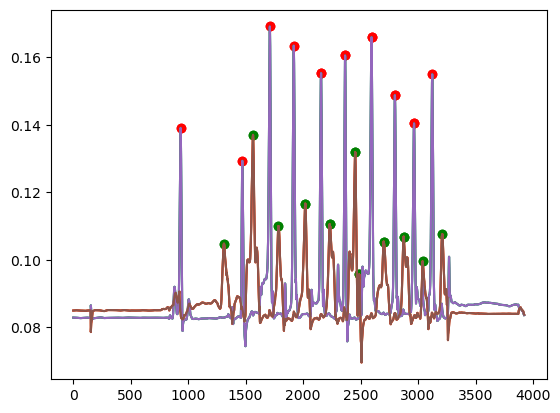

In [46]:
# 查找步高峰值对应的关键帧
def peaks_index(start_index=0,end_index=df.shape[0]):
    L_peaks,L_peak_heights = find_peaks(df.loc[start_index:end_index,'Left Foot z'],
                                        height=(0.08,0.25), prominence=0.05)
    plt.scatter(start_index+L_peaks, df.loc[start_index+L_peaks,"Left Foot z"], 
                color = "red")

    R_peaks, R_peak_heights = find_peaks(df.loc[start_index:end_index,"Right Foot z"],
                                         height=(0.08,0.25),prominence=0.01)
    plt.scatter(start_index+R_peaks, df.loc[start_index+R_peaks,"Right Foot z"], 
                color="green")
    
    df['Left Foot z'].plot()
    df['Right Foot z'].plot()

    return L_peak_heights, R_peak_heights

L_peak_heights = peaks_index()[0]
R_peak_heights = peaks_index()[1]

peaks_index(start_index,end_index)

In [47]:
# 确定基础高度
base_height = df["Left Foot z"].loc[2000] * 100

# 计算左右步高的平均值
R_step_height = np.array(R_peak_heights["peak_heights"]).mean()
L_step_height = np.array(L_peak_heights["peak_heights"]).mean()
print(f"右侧步高为：{R_step_height*100-base_height:.1f} cm")
print(f"左侧步高为：{L_step_height*100-base_height:.1f} cm")

右侧步高为：2.8 cm
左侧步高为：6.9 cm


## Todo
1. 需要能够自行选择查找峰值时的高度，以及峰值的个数
2. 需要合理定义base—height的高度
3. 需要自动查找左右脚着地的特征时刻
4. 需要自动查找左右脚离地的特征时刻
    1. 需要绘制支撑期、摆动期的数据